In [49]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fetch historical stock data using yfinance
symbo = input('Enter :')
symbol= symbo
# Replace 'AAPL' with your desired stock symbol
data = yf.download(symbol, start='2020-01-01', end='2022-12-31')

# Calculate technical indicators (example: moving averages)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# Define labels based on a simple strategy (example: SMA crossover)
data['Signal'] = 0
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1

# Define features and labels
features = ['SMA_50', 'SMA_200']
X = data[features]
y = data['Signal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Random Forest Classifier: {accuracy}")


Enter :IBM
[*********************100%%**********************]  1 of 1 completed
Accuracy of Random Forest Classifier: 0.9761904761904762


In [48]:
# Fetch new data for a specific period
new_data = yf.download(symbol, start='2020-01-01', end='2022-11-16')

# Calculate technical indicators for the new data
new_data['SMA_50'] = new_data['Close'].rolling(window=50).mean()
new_data['SMA_200'] = new_data['Close'].rolling(window=200).mean()
new_data.dropna(inplace=True)

# Define features for prediction
new_features = ['SMA_50', 'SMA_200']
X_new = new_data[new_features]

# Make predictions on new data
new_predictions = rf_classifier.predict(X_new)

# Apply predictions to determine trade signals
new_data['Predicted_Signal'] = new_predictions

# Simulate trades based on predicted signals
# For simplicity, this example assumes a 'buy' signal (1) triggers a long position and a 'sell' signal (0) closes the position
position = 0  # Initial position: 0 indicates no position
for index, row in new_data.iterrows():
    if row['Predicted_Signal'] == 1 and position == 0:  # Buy signal
        position = 1  # Enter long position
        print(f"Buying at {row['Close']} on {index}")
    elif row['Predicted_Signal'] == 0 and position == 1:  # Sell signal
        position = 0  # Close position
        print(f"Selling at {row['Close']} on {index}")


[*********************100%%**********************]  1 of 1 completed
Buying at 123.52772521972656 on 2021-01-12 00:00:00
Selling at 123.61000061035156 on 2021-11-05 00:00:00
Buying at 121.97000122070312 on 2022-02-24 00:00:00
Selling at 124.3499984741211 on 2022-03-10 00:00:00
Buying at 132.89999389648438 on 2022-05-12 00:00:00
Selling at 127.7300033569336 on 2022-09-19 00:00:00


In [65]:
import backtrader as bt
import yfinance as yf


symbol1 = input('Enter Company Symbol:')
symbol2 = input('Enter start date in xx-yy-zz format : ')
symbol3 = input('Enter End Date: ')
# Define a simple moving average crossover strategy
class SMACross(bt.Strategy):
    params = (
        ('fast', 10),
        ('slow', 30),
    )

    def __init__(self):
        self.fast_sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.fast)
        self.slow_sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.slow)
        self.crossover = bt.indicators.CrossOver(self.fast_sma, self.slow_sma)

    def next(self):
        if self.crossover > 0:
            self.buy()
        elif self.crossover < 0:
            self.sell()

# Fetch historical data using yfinance for a specific stock (e.g., AAPL)
data = yf.download(symbol1, symbol2, symbol3)

# Create a cerebro engine
cerebro = bt.Cerebro()

# Add the data to the cerebro engine
data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)

# Add the strategy to the cerebro engine
cerebro.addstrategy(SMACross)

# Set starting cash
cerebro.broker.setcash(10000)

# Run the strategy
cerebro.run()

# Print the final portfolio value
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Enter Company Symbol:IBM
Enter start date in xx-yy-zz format : 2020-12-12
Enter End Date: 2021-12-12
[*********************100%%**********************]  1 of 1 completed
Final Portfolio Value: 10001.74


In [2]:
import yfinance as yf

# Fetch historical data for multiple stocks using yfinance for a specific year
def get_stock_profitability(year):
    # Define a list of stock symbols
    stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']  # Add more symbols as needed

    # Dictionary to store the profitability of each stock
    profitability = {}

    for symbol in stocks:
        # Fetch historical data for the specified year
        data = yf.download(symbol, start=f'{year}-01-01', end=f'{year}-12-31')

        # Calculate profitability for the year
        if not data.empty:
            # Calculate profit as the percentage change from the beginning to the end of the year
            profit = ((data['Close'][-1] - data['Close'][0]) / data['Close'][0]) * 100
            profitability[symbol] = profit

    # Find the most profitable stock
    if profitability:
        most_profitable_stock = max(profitability, key=profitability.get)
        return f"The most profitable stock in {year} is {most_profitable_stock} with a profit of {profitability[most_profitable_stock]:.2f}%"
    else:
        return "No data available for the specified year or symbols"

# Specify the year you want to check for profitability
inty=input('Enter Year: ')
input_year = inty  # Change this to the desired year

# Get the most profitable stock for the input year
result = get_stock_profitability(input_year)
print(result)


Enter Year: 2021
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
The most profitable stock in 2021 is GOOGL with a profit of 69.40%


Enter the company symbol (e.g., AAPL for Apple): GOOGL
[*********************100%%**********************]  1 of 1 completed


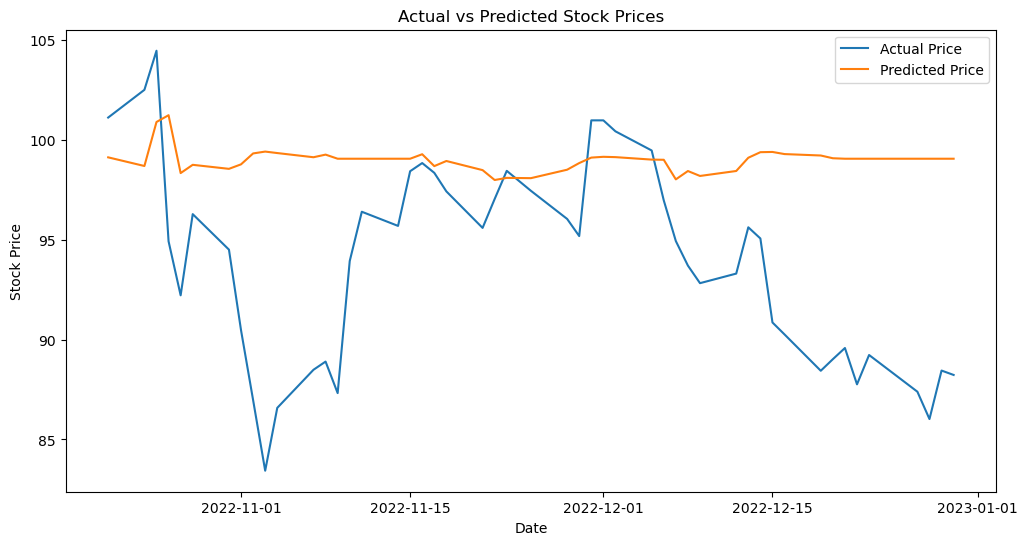

R² score: -1.1014
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for Random Forest model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices).flatten()

    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for Random Forest model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for Random Forest model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Random Forest model with extended hyperparameters
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_

    # Predict stock prices for the test data
    predicted_prices = best_rf.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

    # Calculate R² score
    r_squared = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_prices)

    # Plotting actual prices vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
    plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    print(f"R² score: {r_squared:.4f}")
    print(f"Best hyperparameters: {grid_search.best_params_}")

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")


Enter the company symbol (e.g., AAPL for Apple): aapl
[*********************100%%**********************]  1 of 1 completed


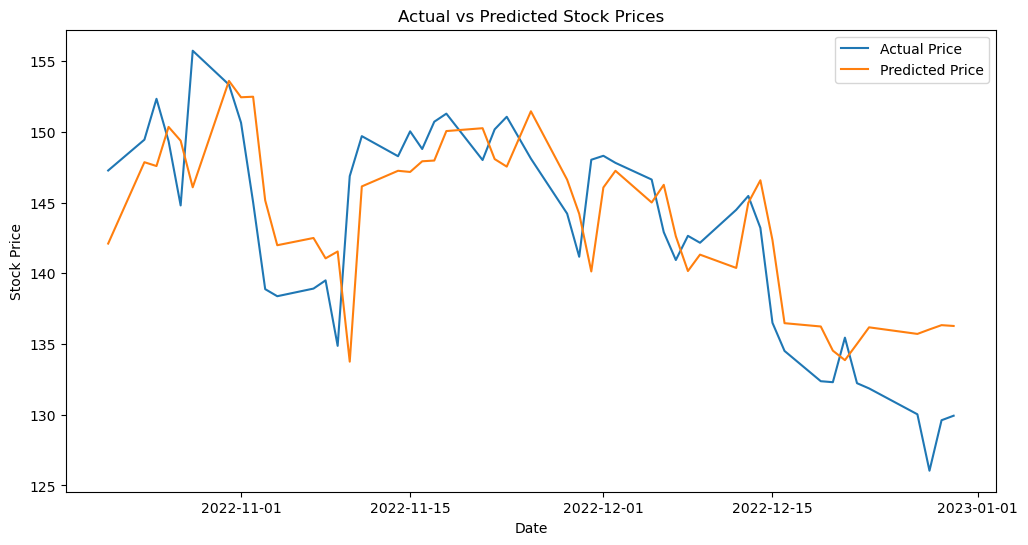

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# Function to fetch historical stock data from yfinance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to preprocess data for Random Forest model
def preprocess_data(data, sequence_length):
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices).flatten()

    x = []
    y = []
    for i in range(len(prices_scaled) - sequence_length):
        x.append(prices_scaled[i:i + sequence_length])
        y.append(prices_scaled[i + sequence_length])

    x = np.array(x)
    y = np.array(y)

    return x, y, scaler

# Symbol of the company stock taken as user input
symbol = input("Enter the company symbol (e.g., AAPL for Apple): ")

# Define the date range for historical data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = fetch_stock_data(symbol, start_date, end_date)

if data is not None and not data.empty:
    # Parameters for Random Forest model and data preprocessing
    sequence_length = 10  # Define sequence length

    # Preprocess data for Random Forest model
    x, y, scaler = preprocess_data(data, sequence_length)

    # Split data into training and testing sets (adjust split ratio as needed)
    split_ratio = 0.8
    split_index = int(len(x) * split_ratio)
    x_train, x_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Random Forest model
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_

    # Predict stock prices for the test data
    predicted_prices = best_rf.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

    # Inverse transform actual prices for evaluation
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plotting actual prices vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], y_test_inverse, label='Actual Price')
    plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

else:
    print(f"No data available for symbol {symbol} or error in fetching data.")
